# **Rendering Feature Maps with Vedo**

## **Load Model and Prediction Tensor**

In [1]:
import YoloDemonstration

In [2]:
model, device = YoloDemonstration.load_model('yolov7.pt')

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block


In [3]:
pred, tensor_collection = YoloDemonstration.img_prediction('input/cat.jpg', model, device)

IMG SIZE = torch.Size([1, 3, 448, 640])


C:\Users\flfo\Anaconda3\envs\CNN_Vis\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [4]:
pred.size()

torch.Size([1, 17640, 85])

In [5]:
layer_num = 0
tensor_collection[layer_num][0][0].size()

torch.Size([32, 448, 640])

## **Build Feature Map Grid**

In [6]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

norm = matplotlib.colors.Normalize()
#norm.vmin = None
#norm.vmax = None

#### *Converting Model Tensors to Grayscale NumPy Arrays*

In [ ]:
img_layer = norm(img_layer) * 255 # normalize values to range [0,1] and multiply by max value 255 (color model)
img_layer = img_layer.round(decimals=0).astype(np.uint8) # round and cast as int object

In [ ]:
layers = [0,1,2,30,60,90,100,104]
layers = [0]


for layer_num in layers:
    

In [7]:
num_img = 64  # must be devisible by rowbreakAfter
rowbreak_after = 8
padding_width = 5
npad = ((0, 0), (padding_width, padding_width), (padding_width, padding_width))

In [8]:
layer_num = 0
test = tensor_collection[layer_num][0][0].detach().numpy()

In [150]:
test_map = test.copy()

In [219]:
from numba import jit, njit, prange

In [149]:
def calc_grayscale(test_map):
    
    for i in range(test_map.shape[0]):

        img = test_map[i]
        norm.vmin = None
        norm.vmax = None
        img = norm(img) * 255
        #print(f"i = {i} \t vmax = {norm.vmax} und vmin = {norm.vmin}")
        test_map[i] = img.round(decimals=0)
        #img = img.round(decimals=0)

    test_map = test_map.astype(np.uint8)
    return test_map

In [ ]:
test_map.shape[0]

In [233]:
@njit(parallel=False)
def calc_grayscale_numba(test_map):
    
    for i in prange(len(test_map)):

        img = test_map[i]
        v_min = np.asarray([img.min()], dtype=np.float32)
        v_max = np.asarray([img.max()], dtype=np.float32)
        img -= v_min
        img /= (v_max - v_min)
        img *= 255

        #norm.vmin = None
        #norm.vmax = None
        #img = norm(img) * 255
        #print(f"i = {i} \t vmax = {norm.vmax} und vmin = {norm.vmin}")
        #test_map[i] = img.round(decimals=0)
        #img = np.around(img, decimals=0)

    return test_map.astype(np.uint8)

In [234]:
%%timeit -n 30
test_map = test.copy()
ret = calc_grayscale_numba(test_map)

65.6 ms ± 7.74 ms per loop (mean ± std. dev. of 7 runs, 30 loops each)


In [262]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [350]:
#@njit(parallel=True)
def calc_grayscale(test_map):
    
    for i in range(test_map.shape[0]):
        img = test_map[i]
        v_min = np.asarray([img.min()], dtype=np.float32)
        v_max = np.asarray([img.max()], dtype=np.float32)
        img -= v_min
        img /= (v_max - v_min)
        img *= np.asarray([255], dtype=np.float32)
        

    test_map = test_map.astype(np.uint8)
    return test_map

In [351]:
#%%timeit -n 30
test_map = test.copy()
ret = calc_grayscale(test_map)

In [282]:
a = np.arange(6).reshape(2,3)
a

array([[0, 1, 2],
       [3, 4, 5]])

In [194]:
%%timeit

test_map = test.copy()
for i in range(test_map.shape[0]):

    img = test_map[i]
    v_min = np.asarray([img.min()])
    v_max = np.asarray([img.max()])
    img -= v_min
    img /= (v_max - v_min)
    img *= 255
    
    #norm.vmin = None
    #norm.vmax = None
    #img = norm(img) * 255
    #print(f"i = {i} \t vmax = {norm.vmax} und vmin = {norm.vmin}")
    #test_map[i] = img.round(decimals=0)
    #img = img.round(decimals=0)

test_map = test_map.astype(np.uint8)

32.6 ms ± 2.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [192]:
%%timeit
test_map.shape[0]

140 ns ± 1.62 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [194]:
%%timeit
len(test_map)

66.6 ns ± 3.12 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [ ]:
for i in range(len(test_map))

In [176]:
#norm.vmin = test_map.min()
#norm.vmax = test_map.max()
test_map = norm(test_map) * 255
test_map = test_map.round(decimals=0).astype(np.uint8)

In [177]:
test_map.max()

255

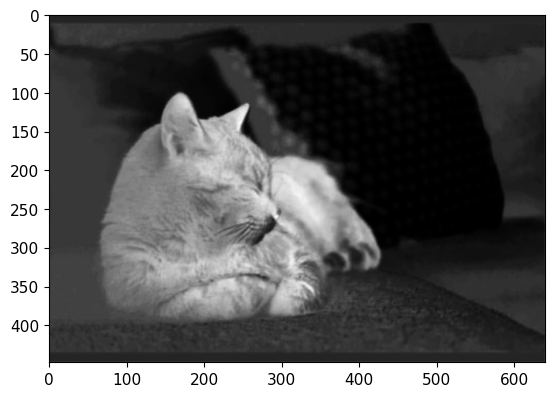

In [352]:
plt.imshow(test_map[8], cmap='gray')

In [80]:
test_map_padded = np.pad(test_map, pad_width=npad, mode='constant', constant_values=255)

In [81]:
test_map_padded.shape

(32, 458, 650)

In [82]:
# rng = np.random.default_rng(seed=42)
# w, h = 640, 448
# data = rng.integers(0, 256, size=(num_img, h, w), dtype=np.uint8)

In [83]:
padded_data = test_map_padded
padded_data = test_map

rows = []
for i in range(0, len(padded_data), rowbreak_after):
    #concatenate arrays along "w" axis
    row = np.concatenate(padded_data[i:i+rowbreak_after], axis=1)
    rows.append(row)
    
img_concat = np.concatenate(rows, axis=0)

In [84]:
cv2.imwrite('test3.jpg', img_concat)

True

(-0.5, 5119.5, 1791.5, -0.5)

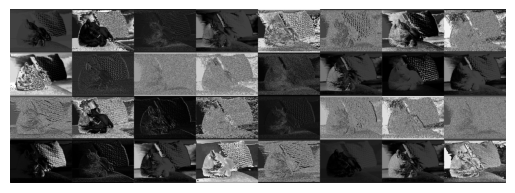

In [236]:
plt.imshow(img_concat, cmap='gray')
plt.axis('off')

In [ ]:
"""Align 2 shapes: a simple line to a polygonal mesh"""
from vedo import *

# settings.default_backend = '2d' # or k3d, itk, ipyvtk, panel, ipygany, or vtk

limb = Mesh(dataurl + "270.vtk").alpha(0.5)
rim  = Mesh(dataurl + "270_rim.vtk").c("red4").ps(10)

# make a clone copy of the rim line and align it to the surface
arim = rim.clone().align_to(limb, rigid=True).c("g").ps(10)

plt = Plotter()
plt += [limb, rim, arim]

# compute how well it fits
d = 0
for p in arim.points():
    cpt = limb.closest_point(p)
    d += mag2(p - cpt)  # square of residual distance

printc("ave. squared distance =", d / arim.npoints, c="g")
plt.show(axes=1)

In [1]:
"""Press q to quit"""

import time
import numpy as np
from vedo import *

settings.default_backend = 'None'

In [2]:
"""Press q to quit"""

import time
import numpy as np
from vedo import Plotter, Picture

rng = np.random.default_rng(seed=42)

#create random array of arrays with size 256x256
w, h = 256, 256
paddingWidth = 5
numberOfImages = 256  # must be devisible by rowbreakAfter
rowbreakAfter = 16


def createImage():
    data = rng.integers(0, 256, size=(numberOfImages, h, w), dtype=np.uint8)

    #do not pad allong fist axis, add "paddingWidth" padding to beginning and end of second and third axis  
    npad = ((0, 0), (paddingWidth, paddingWidth), (paddingWidth, paddingWidth))
    padded_data = np.pad(data, pad_width=npad, mode='constant', constant_values=255)

    rows = []
    for i in range(0, numberOfImages, rowbreakAfter):
        #concatenate arrays along "w" axis
        row = np.concatenate(padded_data[i:i+rowbreakAfter], axis=1)
        rows.append(row)
    #concatenate arrays along "h" axis
    return np.concatenate(rows, axis=0)

def bfunc():
    global timer_id
    plotter.timer_callback("destroy", timer_id)
    if "Play" in button.status():
        # instruct to call handle_timer() every 10 msec:
        timer_id = plotter.timer_callback("create", dt=100)
    button.switch()

def handle_timer(event):
    pic = Picture(createImage())
    plotter.pop().add(pic)


timer_id = None
plotter= Plotter(axes=0)
button = plotter.add_button(bfunc, states=[" Play ","Pause"], size=40)
evntId = plotter.add_callback("timer", handle_timer)

pic = Picture(createImage())


plotter.show(__doc__, pic, mode=8)